# **Asteroid Prediction**


# Import Python Libraries

In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the Asteroid Dataset

In [423]:
df = pd.read_csv('Asteroid.csv',  on_bad_lines='skip')

In [424]:
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


# Column Renaming

In [425]:
readable_df = df.rename(columns={"a": "semi-major axis",
                                        "e": "eccentricity",
                                        "G": "Magnitude slope parameter",
                                        "i": "Inclination with ecliptic plane",
                                        "om": "Longitude of the ascending node",
                                        "w": "argument of perihelion",
                                        "q": "perihelion distance(au)",
                                        "ad": "aphelion distance(au)",
                                        "per_y": "Orbital period",
                                        "data_arc": "data arc-span(d)",
                                        "condition_code": "Orbit condition code",
                                        "n_obs_used": "number of observations used",
                                        "H": "Absolute Magnitude parameter",
                                        })

Full name column is not useful for the model's prediction ability.

In [426]:
readable_df = readable_df.drop(['full_name'], axis=1)
readable_df.head()

,semi-major axis,eccentricity,Magnitude slope parameter,Inclination with ecliptic plane,Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period,data arc-span(d),...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [427]:
readable_df.shape

(839736, 26)

# **Exploration (EDA) & Visualization**

## Handling missing values - dropping values

In [428]:
readable_df.isna().sum()

semi-major axis                         2
eccentricity                            0
Magnitude slope parameter          839617
Inclination with ecliptic plane         0
Longitude of the ascending node         0
argument of perihelion                  0
perihelion distance(au)                 0
aphelion distance(au)                   6
Orbital period                          1
data arc-span(d)                    15789
Orbit condition code                  993
number of observations used             0
Absolute Magnitude parameter         2694
diameter                           702055
extent                             839718
albedo                             703284
rot_per                            820940
GM                                 839722
BV                                 838715
UB                                 838757
IR                                 839735
spec_B                             838070
spec_T                             838756
neo                               

Now we will drop any row with null value in the diameter field

In [429]:
readable_df = readable_df.dropna(axis=0, subset=['diameter'])
readable_df.shape

(137681, 26)

In [430]:
def print_null_columns_sum(df):
    column_null_list = df.columns[df.isna().sum() > 0].tolist()
    print(df[column_null_list].isna().sum())
    
print_null_columns_sum(readable_df)

Magnitude slope parameter       137562
data arc-span(d)                   140
Absolute Magnitude parameter       751
extent                          137665
albedo                            1232
rot_per                         126493
GM                              137667
BV                              136676
UB                              136716
IR                              137680
spec_B                          136311
spec_T                          136716
dtype: int64


There are still a lot of columns with missing values so we will drop them completely

In [431]:
cleaned_df = readable_df.drop(["Magnitude slope parameter", 'spec_T', 'spec_B', "IR", "UB",
                               "BV", "GM", "rot_per", "extent"], axis=1)
print_null_columns_sum(cleaned_df)

data arc-span(d)                 140
Absolute Magnitude parameter     751
albedo                          1232
dtype: int64


In [432]:
print(f"shape before drop: {cleaned_df.shape}")
cleaned_df = cleaned_df.dropna()
print(f"shape after drop:  {cleaned_df.shape}")

shape before drop: (137681, 17)
shape after drop:  (136044, 17)


In [433]:
print_null_columns_sum(cleaned_df)

Series([], dtype: float64)


In [434]:
cleaned_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                            object
albedo                             float64
neo                                 object
pha                                 object
moid                               float64
dtype: object

In [435]:
cleaned_df['Orbit condition code'].value_counts()

0      125682
9        4917
0        1899
9.0       817
1         752
1         551
2         291
5         232
6         142
4         137
3         127
7         109
2          95
5.0        92
8          45
7.0        44
6.0        36
4.0        33
3          32
8.0        11
Name: Orbit condition code, dtype: int64

In [436]:
def adjust_numeric_data_types(df):
    return df.astype({'diameter': 'float64'})

We also change some of the data types of other columns.

In [437]:
cleaned_df = adjust_numeric_data_types(cleaned_df)
cleaned_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                           float64
albedo                             float64
neo                                 object
pha                                 object
moid                               float64
dtype: object

## Dealing with Categorical variables

### neo and pha columns

In [438]:
def handle_categorical_data(df, categories_list=['neo', 'pha']):
    print(categories_list)
    categorical_data = df.select_dtypes(include=['object']).copy()
    new_columns = pd.get_dummies(categorical_data, columns=categories_list, drop_first=True)
    df = df.drop(categories_list, axis = 1)
    model_df = pd.concat([df, new_columns], axis=1)
    return model_df

In [439]:
model_df = handle_categorical_data(cleaned_df)
model_df.head()

['neo', 'pha']


,semi-major axis,eccentricity,Inclination with ecliptic plane,Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period,data arc-span(d),Orbit condition code,number of observations used,Absolute Magnitude parameter,diameter,albedo,moid,Orbit condition code,neo_Y,pha_Y
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,1.59478,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,1.23324,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,1.03454,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,1.13948,0,0,0
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,1.09589,0,0,0


In [440]:
model_df[["neo_Y", "pha_Y"]].dtypes

neo_Y    uint8
pha_Y    uint8
dtype: object

## Correlation Between Features

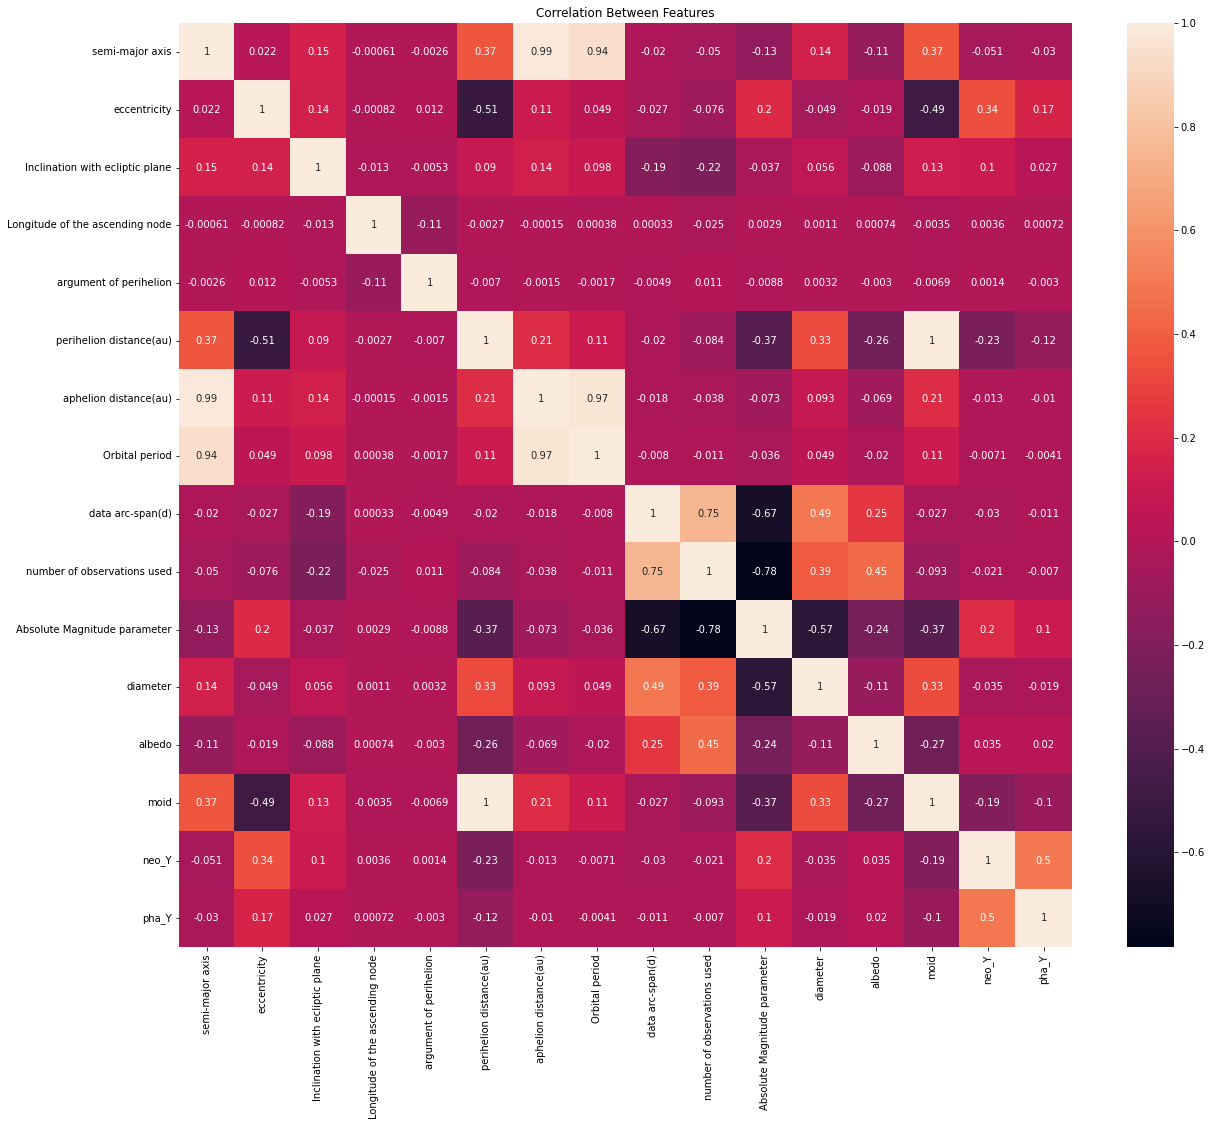

In [441]:
plt.figure(figsize=(20,17))
sns.heatmap(model_df.corr(method='pearson'),annot=True)
plt.title("Correlation Between Features")
plt.show()

In [442]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [443]:
def init_dataset(model_df):
    y = model_df['diameter']
    X = model_df.drop('diameter', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [444]:
X_train, X_test, y_train, y_test = init_dataset(model_df)

In [445]:
def different_models(Classifiers, X_train, X_test, y_train, y_test):
    for classifier in Classifiers.keys():
        clf = Classifiers[classifier]
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        print(f'{classifier}:\n')
        print('Training Accuracy : ' , clf.score(X_train, y_train))
        print('Test Accuracy : ' , clf.score(X_test, y_test))
        print(f"MSE score is: {mean_squared_error(y_test, predict)}")

## Basic Regression Models

In [446]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [447]:
Classifiers = {"Linear Regression": LinearRegression(),
              "Random Forest": RandomForestRegressor(),
             }
different_models(Classifiers, X_train, X_test, y_train, y_test)

### Result conclusion from the models
Basic Linear Regression was able to achieve only 37% accuracy results (with high overfitting). </br>
Basic Random Forest was able to achieve 93% accuracy results (with a little overfitting). </br>

### Dropping columns which has more than 90% of missing values

In [449]:
def print_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value = pd.DataFrame({'column': df.columns,'percent_missing': percent_missing})
    missing_value = missing_value.sort_values('percent_missing', ascending=False)    
    
    column_null_list = missing_value[missing_value["percent_missing"] > 0]
    print(column_null_list["percent_missing"])
    return missing_value

In [450]:
missing_value = print_percent_missing(readable_df)

IR                              99.999274
GM                              99.989832
extent                          99.988379
Magnitude slope parameter       99.913568
spec_T                          99.299104
UB                              99.299104
BV                              99.270052
spec_B                          99.004946
rot_per                         91.873970
albedo                           0.894822
Absolute Magnitude parameter     0.545464
data arc-span(d)                 0.101684
Name: percent_missing, dtype: float64


In [451]:
drop_cols = missing_value["column"][missing_value["percent_missing"] > 90]
cleaned_df = readable_df.drop(columns=drop_cols)

# Split the dataset into training and testing sets

In [452]:
cleaned_df = adjust_numeric_data_types(cleaned_df)
dtf_train, dtf_test = train_test_split(cleaned_df, test_size=0.2)

In [453]:
print_null_columns_sum(dtf_train)

data arc-span(d)                107
Absolute Magnitude parameter    582
albedo                          966
dtype: int64


In [454]:
dtf_train.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
diameter                           float64
albedo                             float64
neo                                 object
pha                                 object
moid                               float64
dtype: object

In [455]:
nan_cols_contiguous = ['data arc-span(d)', 'Absolute Magnitude parameter', 'albedo']

# "One Hot" encoding

In [456]:
dtf_train = handle_categorical_data(dtf_train,dtf_train.select_dtypes(include=['object']).columns)
dtf_test = handle_categorical_data(dtf_test,dtf_test.select_dtypes(include=['object']).columns)

Index(['Orbit condition code', 'neo', 'pha'], dtype='object')
Index(['Orbit condition code', 'neo', 'pha'], dtype='object')


# Predict missing values

In [457]:
def predict_missing_values(nan_cols, model_df_train, model_df_test):

  for arg in nan_cols:
    model_copy = model_df_train.copy()
    nan_cols_con_copy = nan_cols.copy()
    nan_cols_con_copy.remove(arg)
    model_copy = model_copy.drop(nan_cols_con_copy, axis=1)
    test_data = model_copy[model_copy[arg].isnull()]
    model_copy.dropna(inplace=True)

    y_train = model_copy[arg]
    X_train = model_copy.drop(arg, axis=1)
    X_test = test_data.drop(arg, axis=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_df_train.loc[model_df_train[arg].isnull(), arg] = y_pred
    #model_copy_test = model_df_test.copy()

    test_data = model_df_test[model_df_test[arg].isnull()]
    #y_pred_test = model.predict(model_df_test.drop(arg, axis=1))
    y_pred_test = model.predict(test_data.drop(nan_cols, axis=1))
    model_df_test.loc[model_df_test[arg].isnull(), arg] = y_pred_test

In [458]:
dtf_train_predict = dtf_train.copy()
dtf_test_predict = dtf_test.copy()


In [459]:
predict_missing_values(nan_cols_contiguous, dtf_train_predict, dtf_test_predict)

In [460]:
print_null_columns_sum(dtf_train_predict)

Series([], dtype: float64)


# Basic Regression Models

In [461]:
y_train = dtf_train_predict['diameter']
X_train = dtf_train_predict.drop(['diameter'], axis = 1)
y_test = dtf_test_predict['diameter']
X_test = dtf_test_predict.drop(['diameter'], axis = 1)

In [462]:
Classifiers = {"Linear Regression": LinearRegression(),
              "Random Forest": RandomForestRegressor(),
             }
different_models(Classifiers, X_train, X_test, y_train, y_test)

Linear Regression:

Training Accuracy :  0.4744060733054599
Test Accuracy :  0.4468463769977409
MSE score is: 47.688765012177804
Random Forest:

Training Accuracy :  0.9946773261104737
Test Accuracy :  0.9684290872382807
MSE score is: 2.721807789564907


### Result conclusion from the models
Basic Linear Regression was able to achieve only 44% accuracy results (with high overfitting). </br>
Basic Random Forest was able to achieve 97% accuracy results (with a little overfitting). </br>

# Fill null values with the mean

In [463]:
def fillnawithMean(nan_cols, dtf_train, dtf_test):
  for arg in nan_cols:
    dtf_train[arg] = dtf_train[arg].fillna(dtf_train[arg].mean())
    dtf_test[arg] = dtf_test[arg].fillna(dtf_train[arg].mean())

In [464]:
dtf_train_mean = dtf_train.copy()
dtf_test_mean = dtf_test.copy()

In [469]:
fillnawithMean(nan_cols_contiguous,dtf_train_mean, dtf_test_mean)

In [470]:
print_null_columns_sum(dtf_train_mean)

Series([], dtype: float64)


# Basic Regression Models

In [471]:
y_train = dtf_train_mean['diameter']
X_train = dtf_train_mean.drop(['diameter'], axis = 1)
y_test = dtf_test_mean['diameter']
X_test = dtf_test_mean.drop(['diameter'], axis = 1)

In [472]:
Classifiers = {"Linear Regression": LinearRegression(),
              "Random Forest": RandomForestRegressor(),
             }
different_models(Classifiers, X_train, X_test, y_train, y_test)

Linear Regression:

Training Accuracy :  0.4735762250904705
Test Accuracy :  0.44560822789525156
MSE score is: 47.79550896023003
Random Forest:

Training Accuracy :  0.9929964041378608
Test Accuracy :  0.9654564881388173
MSE score is: 2.9780830339722635


### Result conclusion from the models
Basic Linear Regression was able to achieve only 44% accuracy results (with high overfitting). </br>
Basic Random Forest was able to achieve 97% accuracy results (with a little overfitting). </br>

<h3>Ways to improve:</h3>
<ul>
    <li>Data cleaning and manipulation</li>
    <li>Feature selection</li>
    <li>Hyperparameter tuning</li>
    <li>Boosting methods such as XGBoost</li>
</ul>